Andiamo a fare data cleaning sul seguente dataset

In [2]:
pip list

Package                   Version
------------------------- ----------
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.2
bleach                    6.1.0
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.19.1
fqdn                      1.5.1
idna                      3.6
importlib-metadata        7.0.1
ipykernel                 6.28.0
ipython                   8.18.1
ipywidgets                8.1.1
isoduration               20.11.0
jedi               

You should consider upgrading via the 'C:\Users\simon\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install seaborn

     -------------------------------------- 294.8/294.8 KB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\simon\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('DM.xls')
df.head()

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
0,1,539-84-9599,1944-10-26,78,East,0,62900,4,2080
1,2,444-05-4079,1932-01-01,67,West,1,23300,0,0
2,3,418-18-5649,1973-08-17,25,East,1,48700,8,3990
3,4,065-63-3311,1947-08-02,51,West,1,137600,2,920
4,5,059-58-9566,1948-10-03,50,East,0,101400,2,1000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer      1500 non-null   int64         
 1   SSN           1500 non-null   object        
 2   Birthdate     1500 non-null   datetime64[ns]
 3   Age           1500 non-null   int64         
 4   Region        1500 non-null   object        
 5   CredCardUser  1500 non-null   int64         
 6   Income        1500 non-null   int64         
 7   Purchases     1500 non-null   int64         
 8   AmtSpent      1500 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 105.6+ KB


In [15]:
print('\nGestione valori duplicati')
if len(df['SSN'].unique()) < len(df.index):
    df = df.drop_duplicates('SSN', keep='first')
    print('\nNuovo dataset con righe pari a: ', len(df))
else:
    print('\nNon sono presenti duplicati. ')


Gestione valori duplicati

Nuovo dataset con righe pari a:  1498


Quindi possiamo notare che avevamo 2 doppi di SSN

Conto i valori NaN nelle colonne Income e Purchases

In [16]:
print('Conteggio valori NaN :')
print(df.isna().sum())

Conteggio valori NaN :
Customer        0
SSN             0
Birthdate       0
Age             0
Region          0
CredCardUser    0
Income          0
Purchases       0
AmtSpent        0
dtype: int64


Quindi non abbiamo nessun valore nullo all'interno delle serie

Identificazione outliers di Income


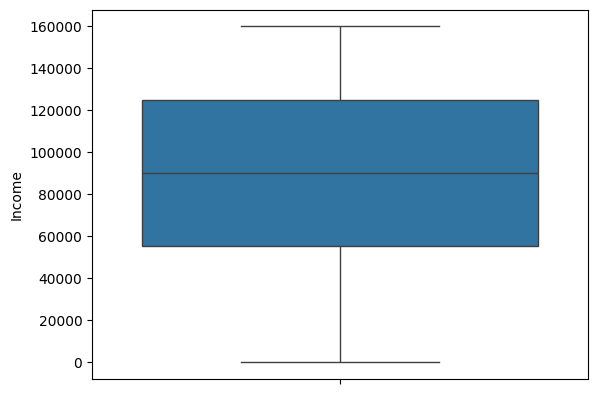

In [17]:
print('Identificazione outliers di Income')
boxplot = sns.boxplot(df['Income'])

In [18]:
out2 = df[df['Income']==0]
out1 = df[df['Income']==160000]
out2

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent


In [19]:
out1

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
454,455,308-15-1508,1975-06-14,23,North,1,160000,2,1050
538,539,445-94-4117,1958-02-11,41,East,0,160000,3,1550


Identificazione outliers di Purchases


(array([1480.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          18.]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <BarContainer object of 10 artists>)

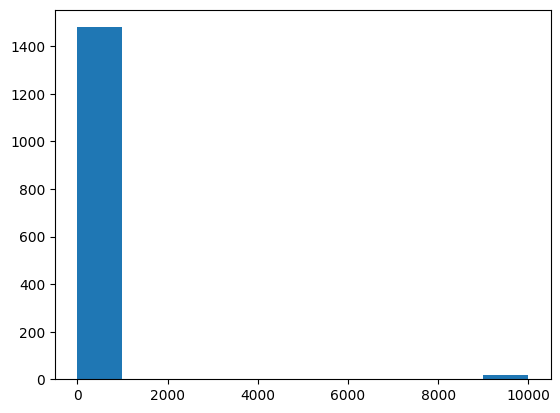

In [20]:
print('Identificazione outliers di Purchases')
plt.hist(df['Purchases'])

In [21]:
val = df['Purchases']==9999
df[val]

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
13,14,614-59-6703,1972-08-01,26,South,1,54400,9999,9999
152,153,048-55-8930,1934-09-05,64,West,1,64400,9999,9999
249,250,586-87-0627,1952-06-24,46,East,1,53300,9999,9999
286,287,133-53-5943,1935-09-22,63,North,1,20000,9999,9999
316,317,865-85-3875,1931-12-19,67,South,0,149900,9999,9999
374,375,867-63-6238,1971-09-17,27,West,0,29900,9999,9999
431,432,572-79-9529,1967-01-21,32,West,1,104500,9999,9999
442,443,087-21-2053,1952-07-02,46,West,0,141200,9999,9999
468,469,797-55-3419,1961-09-16,37,North,1,132800,9999,9999
857,858,819-34-4450,1959-05-26,39,South,1,101300,9999,9999


Una volta individuate le righe con outliers in Purchases li sostituisco con la media generale

In [22]:
print(df.dtypes)

Customer                 int64
SSN                     object
Birthdate       datetime64[ns]
Age                      int64
Region                  object
CredCardUser             int64
Income                   int64
Purchases                int64
AmtSpent                 int64
dtype: object


In [23]:
df['Purchases']=df['Purchases'].replace(9999,None)
media = df['Purchases'].mean()
df['Purchases'] = df['Purchases'].fillna(value=media)

df.dtypes

Customer                 int64
SSN                     object
Birthdate       datetime64[ns]
Age                      int64
Region                  object
CredCardUser             int64
Income                   int64
Purchases              float64
AmtSpent                 int64
dtype: object

(array([ 68., 215., 358., 344., 269., 141.,  66.,  22.,  13.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

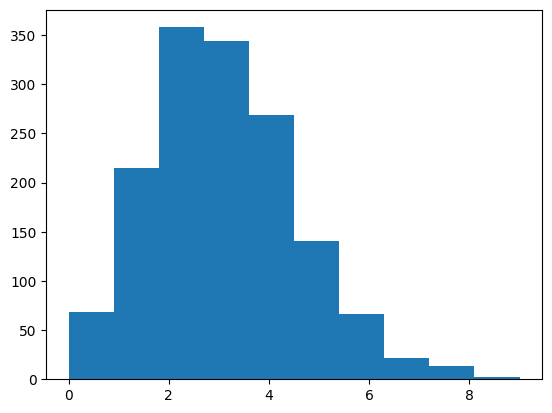

In [24]:
plt.hist(df['Purchases'])

(array([263., 357., 312., 310., 244.,   0.,   0.,   0.,   0.,  12.]),
 array([-15570. , -11835.8,  -8101.6,  -4367.4,   -633.2,   3101. ,
          6835.2,  10569.4,  14303.6,  18037.8,  21772. ]),
 <BarContainer object of 10 artists>)

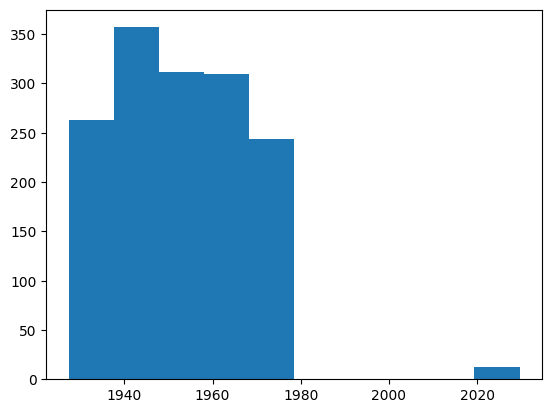

In [25]:
plt.hist(df['Birthdate'])

Come possiamo notare ci sono alcune date non formattate bene dato che vengono considerate come
se fossero post 2020.
Procediamo a correggerle

In [26]:
from dateutil.relativedelta import relativedelta

for el in df['Birthdate']:
    if el.year > 2000:
        f = el - relativedelta(years=100)
        df['Birthdate'] = df['Birthdate'].replace(el,f)

(array([ 55., 163., 173., 175., 162., 170., 140., 167., 146., 147.]),
 array([-16215. , -14339.3, -12463.6, -10587.9,  -8712.2,  -6836.5,
         -4960.8,  -3085.1,  -1209.4,    666.3,   2542. ]),
 <BarContainer object of 10 artists>)

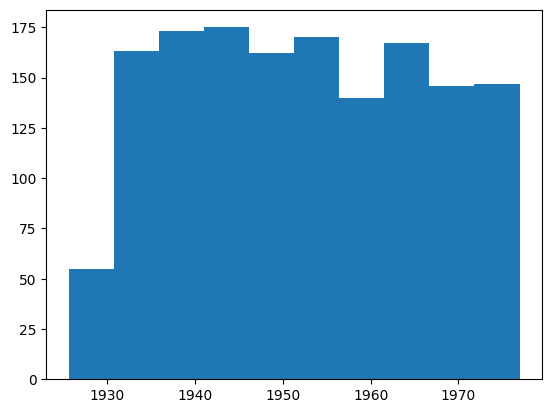

In [27]:
plt.hist(df['Birthdate'])

In questo modo abbiamo "aggiustato" il dataset

Ora controlliamo se le regioni sono state scritte tutte in modo corretto

In [28]:
df['Region'].unique()

array([' East', 'West', 'East', 'South', 'North', ' North', ' West',
       ' South'], dtype=object)

Procediamo a correggere gli errori di digitazione

In [29]:
dizionario = {' East':'East',' North':'North', ' West':'West', ' South':'South'}

digiterror = df['Region'].isin(dizionario.keys())

if digiterror.any():
    df['Region'].replace(dizionario, inplace=True)
    print('Gli errori di digitazione nella colonna 1 sono stati corretti')
    print(df['Region'])
else:
    print('Non ci sono errori di digitazione.')

Gli errori di digitazione nella colonna 1 sono stati corretti
0        East
1        West
2        East
3        West
4        East
        ...  
1495     West
1496    South
1497    North
1498    South
1499    South
Name: Region, Length: 1498, dtype: object


Controlliamo se ci sono errori di formattazione all'interno della serie 'CredCardUser'

In [30]:
errori = pd.to_numeric(df['CredCardUser']).isna().sum()
if errori:
    print('Ci sono',errori,'errori di formattazione.')
else:
    print('Non ci sono errori di formattazione.')

Non ci sono errori di formattazione.


Controlliamo se sono presenti valori sconosciuti di 'Age'

In [31]:
val_sconosciuti = df['Age'].isnull().sum()
if val_sconosciuti:
    print('Non sono presenti valori sconosciuti di "Age".\n')
else:
    print('Sono presenti',val_sconosciuti,'valori sconosciuti nella colonna Age.\n')
 

Sono presenti 0 valori sconosciuti nella colonna Age.
